In [1]:
# Project: Customer Churn Analysis
# Goal: Menemukan faktor penyebab churn dan rekomendasi bisnis untuk meningkatkan retensi pelanggan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())
print(df.info())
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
#data cleaning

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop_duplicates(inplace=True)

In [9]:
#EDA
print(df['Churn'])
churn_rate = df['Churn'].value_counts(normalize=True)*100
print(churn_rate)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


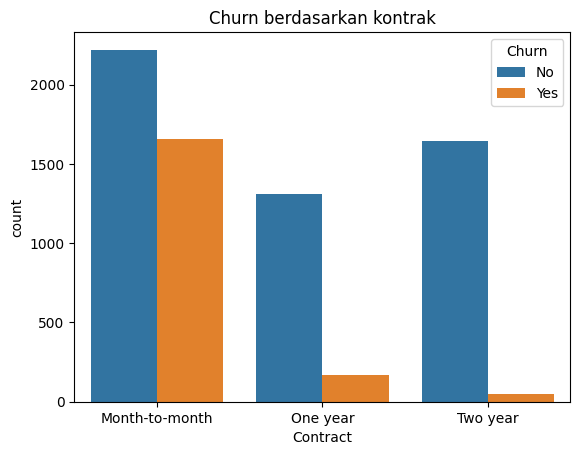

In [10]:
#visualisasi churn berdasarkan kontrak
sns.countplot(data=df, x ='Contract',hue='Churn')
plt.title("Churn berdasarkan kontrak")
plt.show()

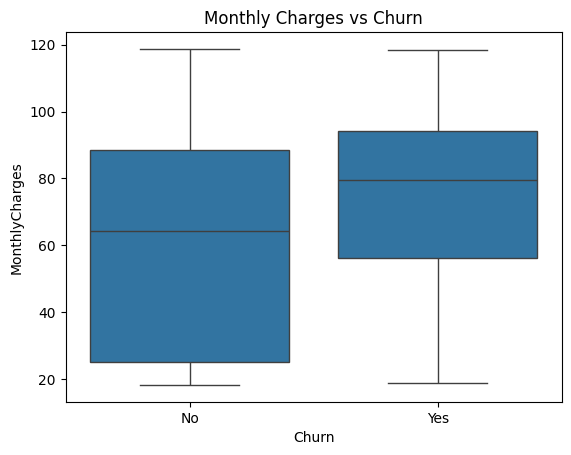

In [11]:
#visualisasi montly chrges vs churm
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

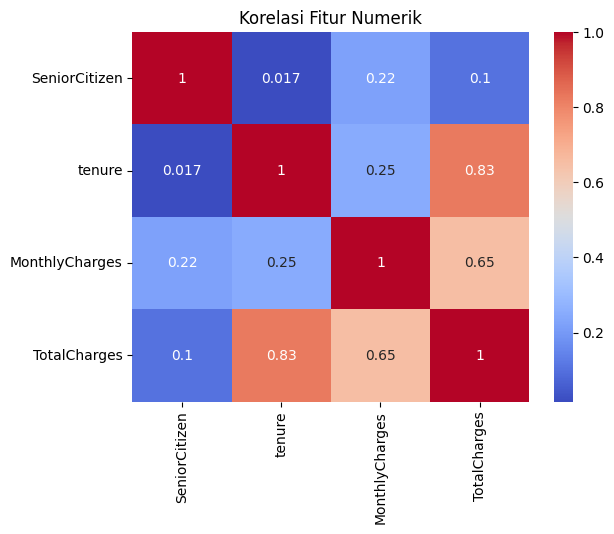

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#korelasi yang numerik
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()